In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.metrics import r2_score
import warnings

In [2]:
ballygunge = pd.read_csv('C:/Users/shova/iCloudDrive/Kolkata_data/Work/Semi_processed/Ballygunge.csv')    # reads the Ballygunge file
ballygunge.head()

,Date,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone,AT,AQI,AQI_Standard
0,2019-08-30,15.36,26.35,23.30,12.31,1.84,0.37,24.52,30.56,29.12,Good
1,2019-08-31,14.78,29.30,19.09,15.00,2.61,0.33,25.19,29.72,29.30,Good
2,2019-09-01,22.12,42.97,25.03,10.62,2.23,0.48,22.21,28.83,42.97,Good
3,2019-09-02,10.06,21.85,24.25,31.03,1.91,0.42,19.23,29.02,30.31,Good
4,2019-09-03,8.43,15.31,22.70,35.45,2.89,0.39,22.00,28.63,28.38,Good


In [3]:
ballygunge['Date'] = pd.to_datetime(ballygunge['Date'], format="%Y-%m-%d") # converts the date values to proper date format from string for plotting purposes
ballygunge["month"] = ballygunge["Date"].dt.month
ballygunge["week"] = ballygunge["Date"].dt.strftime('%V').astype('int64')
ballygunge["week_day"] = ballygunge["Date"].dt.weekday
ballygunge.head()

,Date,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone,AT,AQI,AQI_Standard,month,week,week_day
0,2019-08-30,15.36,26.35,23.30,12.31,1.84,0.37,24.52,30.56,29.12,Good,8,35,4
1,2019-08-31,14.78,29.30,19.09,15.00,2.61,0.33,25.19,29.72,29.30,Good,8,35,5
2,2019-09-01,22.12,42.97,25.03,10.62,2.23,0.48,22.21,28.83,42.97,Good,9,35,6
3,2019-09-02,10.06,21.85,24.25,31.03,1.91,0.42,19.23,29.02,30.31,Good,9,36,0
4,2019-09-03,8.43,15.31,22.70,35.45,2.89,0.39,22.00,28.63,28.38,Good,9,36,1


In [4]:
ballygunge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220 entries, 0 to 1219
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1220 non-null   datetime64[ns]
 1   PM2.5         1220 non-null   float64       
 2   PM10          1220 non-null   float64       
 3   NO2           1220 non-null   float64       
 4   NH3           1220 non-null   float64       
 5   SO2           1220 non-null   float64       
 6   CO            1220 non-null   float64       
 7   Ozone         1220 non-null   float64       
 8   AT            1220 non-null   float64       
 9   AQI           1220 non-null   float64       
 10  AQI_Standard  1220 non-null   object        
 11  month         1220 non-null   int64         
 12  week          1220 non-null   int64         
 13  week_day      1220 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int64(3), object(1)
memory usage: 133.6+ KB


## Support Vector Regression

In [5]:
model_svr = SVR(kernel = 'rbf', C=100,  epsilon=0.1)

### PM 2.5

In [6]:
data_pm25 = pd.DataFrame()
data_pm25["month"] = ballygunge["month"]
data_pm25["week"] = ballygunge["week"]
data_pm25["week_day"] = ballygunge["week_day"]
data_pm25["PM2.5"] = ballygunge["PM2.5"]
cols = data_pm25.columns
data_pm25.head()

,month,week,week_day,PM2.5
0,8,35,4,15.36
1,8,35,5,14.78
2,9,35,6,22.12
3,9,36,0,10.06
4,9,36,1,8.43


In [7]:
# shuffling the data set
data_pm25 = data_pm25.sample(frac=1).reset_index()
data_pm25 = data_pm25.drop('index', axis=1)
data_pm25.head()

,month,week,week_day,PM2.5
0,4,16,5,32.67
1,5,21,5,27.05
2,5,19,6,23.06
3,1,4,3,123.01
4,6,25,0,24.94


In [8]:
duplicate_pm25 = data_pm25.copy()

In [9]:
#normalizing the dataset
data_pm25 = preprocessing.normalize(data_pm25,norm='l2')
data_pm25 = pd.DataFrame(data_pm25, columns=cols)

In [10]:
X_pm25 = data_pm25.drop('PM2.5', axis=1) #data basically refere to the values in the independent columns
X_pm25.shape

(1220, 3)

In [11]:
y_pm25 = data_pm25.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)
y_pm25.shape      

(1220, 1)

In [12]:
X_train = X_pm25.head(976)
X_test = X_pm25.tail(244)
y_train = y_pm25.head(976)
y_test = y_pm25.tail(244)

In [13]:
ballygunge_pm25_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [14]:
predictions_pm25 = ballygunge_pm25_svr.predict(X_test)

In [15]:
r2 = r2_score(y_test, predictions_pm25)
print('r2 score for  model is', r2)

r2 score for  model is 0.9594066399383169


In [16]:
#RSME - Root Mean Square Error
predictions_pm25 = predictions_pm25.reshape(244,1)
np.sqrt(((predictions_pm25 - y_test)**2).mean())

PM2.5    0.055027
dtype: float64

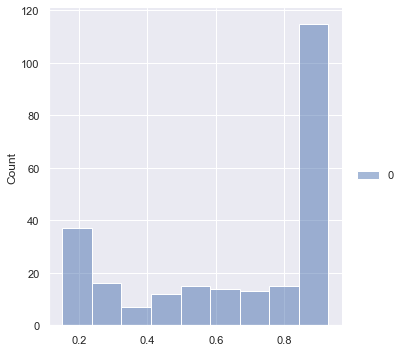

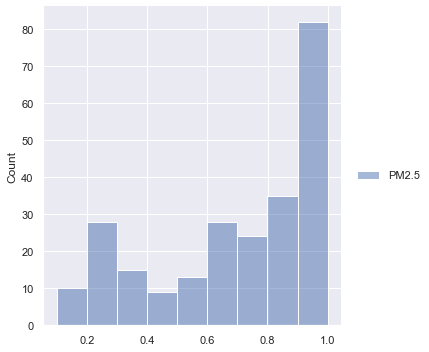

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_pm25)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

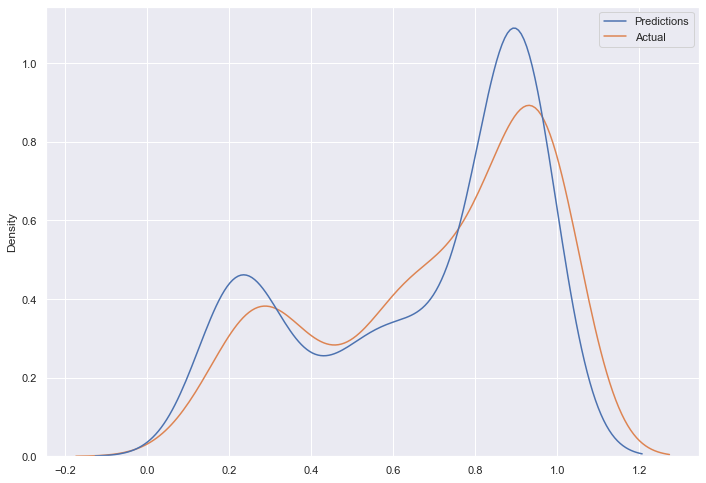

In [18]:
results = pd.DataFrame(predictions_pm25, columns = ['Predictions'])
results["Actual"] = list(y_test["PM2.5"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### PM10

In [19]:
data_pm10 = pd.DataFrame()
data_pm10["month"] = ballygunge["month"]
data_pm10["week"] = ballygunge["week"]
data_pm10["week_day"] = ballygunge["week_day"]
data_pm10["PM10"] = ballygunge["PM10"]
cols = data_pm10.columns
data_pm10.head()

,month,week,week_day,PM10
0,8,35,4,26.35
1,8,35,5,29.30
2,9,35,6,42.97
3,9,36,0,21.85
4,9,36,1,15.31


In [20]:
# shuffling the data set
data_pm10 = data_pm10.sample(frac=1).reset_index()
data_pm10 = data_pm10.drop('index', axis=1)
data_pm10.head()

,month,week,week_day,PM10
0,7,27,3,47.18
1,6,26,4,25.66
2,11,44,5,143.15
3,11,45,4,99.43
4,9,36,1,26.38


In [21]:
duplicate_pm10 = data_pm10.copy()

In [22]:
#normalizing the dataset
data_pm10 = preprocessing.normalize(data_pm10,norm='l2')
data_pm10 = pd.DataFrame(data_pm10, columns=cols)

In [23]:
X_pm10 = data_pm10.drop('PM10', axis=1) #data basically refere to the values in the independent columns
y_pm10 = data_pm10.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [24]:
X_train = X_pm10.head(976)
X_test = X_pm10.tail(244)
y_train = y_pm10.head(976)
y_test = y_pm10.tail(244)

In [25]:
ballygunge_pm10_model_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [26]:
predictions_pm10 = ballygunge_pm10_model_svr.predict(X_test)

In [27]:
r2 = r2_score(y_test, predictions_pm10)
print('r2 score for   model is', r2)

r2 score for   model is 0.6086889519813521


In [28]:
predictions_pm10.shape

(244,)

In [29]:
#RSME - Root Mean Square Error
predictions4 = predictions_pm10.reshape(244,1)
np.sqrt(((predictions4 - y_test)**2).mean())

PM10    0.092092
dtype: float64

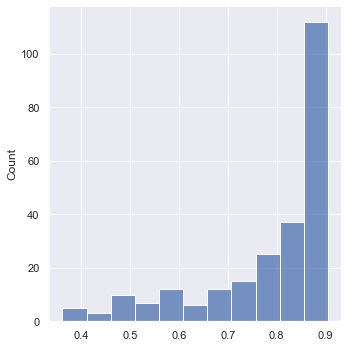

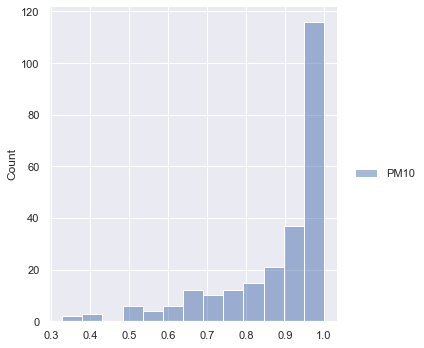

In [30]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_pm10)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

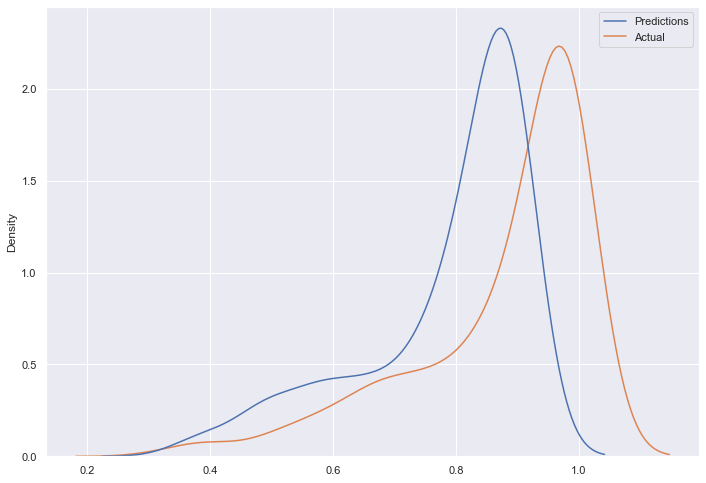

In [31]:
results = pd.DataFrame(predictions_pm10, columns = ['Predictions'])
results["Actual"] = list(y_test["PM10"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### NO2

In [32]:
data_no2 = pd.DataFrame()
data_no2["month"] = ballygunge["month"]
data_no2["week"] = ballygunge["week"]
data_no2["week_day"] = ballygunge["week_day"]
data_no2["NO2"] = ballygunge["NO2"]
cols = data_no2.columns
data_no2.head()

,month,week,week_day,NO2
0,8,35,4,23.30
1,8,35,5,19.09
2,9,35,6,25.03
3,9,36,0,24.25
4,9,36,1,22.70


In [33]:
# shuffling the data set
data_no2 = data_no2.sample(frac=1).reset_index()
data_no2 = data_no2.drop('index', axis=1)
data_no2.head()

,month,week,week_day,NO2
0,12,48,5,80.80
1,9,36,3,17.93
2,3,12,4,8.51
3,7,28,4,9.50
4,8,32,3,7.90


In [34]:
duplicate_no2 = data_no2.copy()

In [35]:
#normalizing the dataset
data_no2 = preprocessing.normalize(data_no2,norm='l2')
data_no2 = pd.DataFrame(data_no2, columns=cols)

In [36]:
X_no2 = data_no2.drop('NO2', axis=1) #data basically refere to the values in the independent columns
y_no2 = data_no2.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [37]:
X_train = X_no2.head(976)
X_test = X_no2.tail(244)
y_train = y_no2.head(976)
y_test = y_no2.tail(244)

In [38]:
ballygunge_no2_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [39]:
predictions_no2 = ballygunge_no2_svr.predict(X_test)

In [40]:
r2 = r2_score(y_test, predictions_no2)
print('r2 score for   model is', r2)

r2 score for   model is 0.9523083890323747


In [41]:
predictions_no2.shape

(244,)

In [42]:
#RSME - Root Mean Square Error
predictions5 = predictions_no2.reshape(244,1)
np.sqrt(((predictions5 - y_test)**2).mean())

NO2    0.061757
dtype: float64

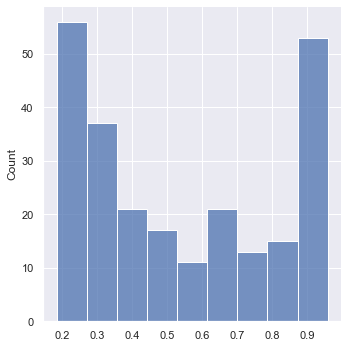

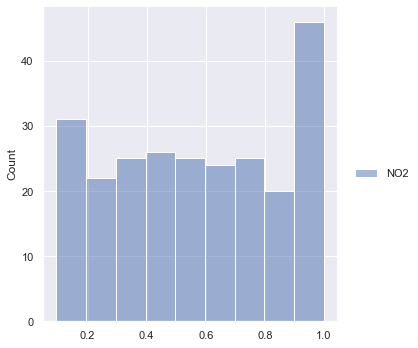

In [43]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_no2)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

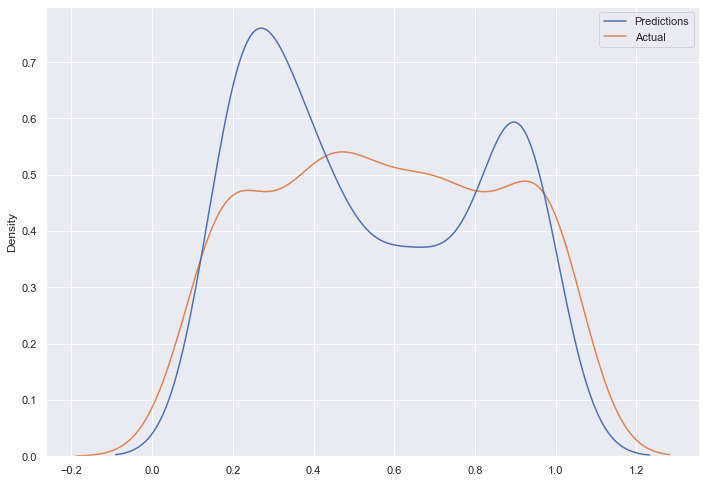

In [44]:
results = pd.DataFrame(predictions_no2, columns = ['Predictions'])
results["Actual"] = list(y_test["NO2"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### NH3

In [45]:
data_nh3 = pd.DataFrame()
data_nh3["month"] = ballygunge["month"]
data_nh3["week"] = ballygunge["week"]
data_nh3["week_day"] = ballygunge["week_day"]
data_nh3["NH3"] = ballygunge["NH3"]
cols = data_nh3.columns
data_nh3.head()

,month,week,week_day,NH3
0,8,35,4,12.31
1,8,35,5,15.00
2,9,35,6,10.62
3,9,36,0,31.03
4,9,36,1,35.45


In [46]:
# shuffling the data set
data_nh3 = data_nh3.sample(frac=1).reset_index()
data_nh3 = data_nh3.drop('index', axis=1)
data_nh3.head()

,month,week,week_day,NH3
0,7,30,2,4.95
1,10,40,0,13.98
2,9,36,1,14.96
3,10,43,3,15.65
4,3,12,4,11.54


In [47]:
duplicate_nh3 = data_nh3.copy()

In [48]:
#normalizing the dataset
data_nh3 = preprocessing.normalize(data_nh3,norm='l2')
data_nh3 = pd.DataFrame(data_nh3, columns=cols)

In [49]:
X_nh3 = data_nh3.drop('NH3', axis=1) #data basically refere to the values in the independent columns
y_nh3 = data_nh3.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [50]:
X_train = X_nh3.head(976)
X_test = X_nh3.tail(244)
y_train = y_nh3.head(976)
y_test = y_nh3.tail(244)

In [51]:
ballygunge_nh3_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [52]:
predictions_nh3 = ballygunge_nh3_svr.predict(X_test)

In [53]:
r2 = r2_score(y_test, predictions_nh3)
print('r2 score for   model is', r2)

r2 score for   model is 0.9465733147304924


In [54]:
predictions_nh3.shape

(244,)

In [55]:
#RSME - Root Mean Square Error
predictions5 = predictions_nh3.reshape(244,1)
np.sqrt(((predictions5 - y_test)**2).mean())

NH3    0.061805
dtype: float64

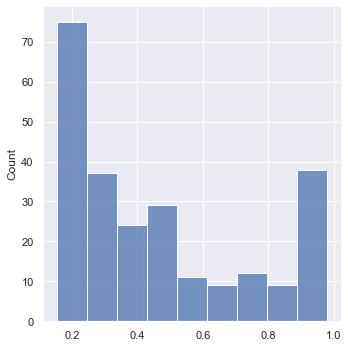

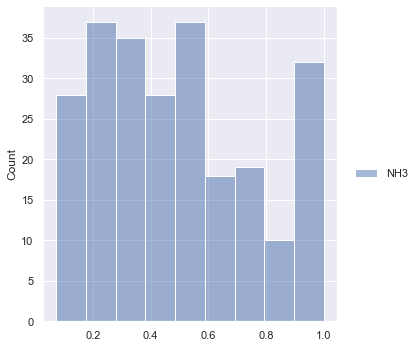

In [56]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_nh3)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

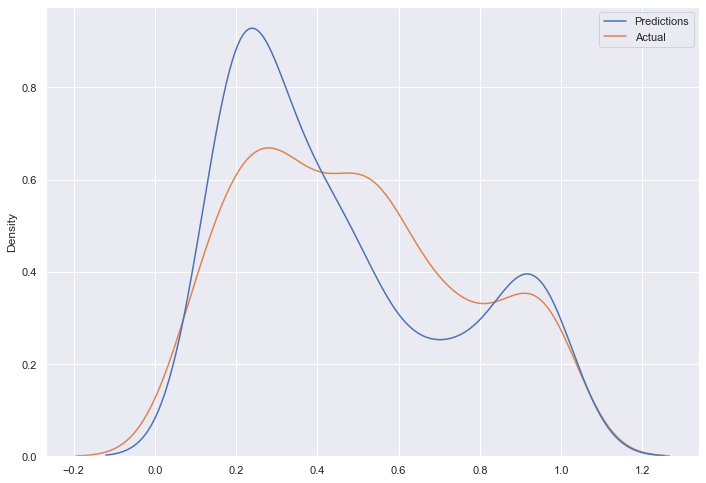

In [57]:
results = pd.DataFrame(predictions_nh3, columns = ['Predictions'])
results["Actual"] = list(y_test["NH3"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### SO2

In [58]:
data_so2 = pd.DataFrame()
data_so2["month"] = ballygunge["month"]
data_so2["week"] = ballygunge["week"]
data_so2["week_day"] = ballygunge["week_day"]
data_so2["SO2"] = ballygunge["SO2"]
cols = data_so2.columns
data_so2.head()

,month,week,week_day,SO2
0,8,35,4,1.84
1,8,35,5,2.61
2,9,35,6,2.23
3,9,36,0,1.91
4,9,36,1,2.89


In [59]:
# shuffling the data set
data_so2 = data_so2.sample(frac=1).reset_index()
data_so2 = data_so2.drop('index', axis=1)
data_so2.head()

,month,week,week_day,SO2
0,12,50,5,17.41
1,4,15,4,5.64
2,5,21,0,3.24
3,7,27,2,7.04
4,6,25,1,13.13


In [60]:
duplicate_so2 = data_so2.copy()

In [61]:
#normalizing the dataset
data_so2 = preprocessing.normalize(data_so2,norm='l2')
data_so2 = pd.DataFrame(data_so2, columns=cols)

In [62]:
X_so2 = data_so2.drop('SO2', axis=1) #data basically refere to the values in the independent columns
y_so2 = data_so2.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [64]:
X_train = X_so2.head(976)
X_test = X_so2.tail(244)
y_train = y_so2.head(976)
y_test = y_so2.tail(244)

In [65]:
ballygunge_so2_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [66]:
predictions_so2 = ballygunge_so2_svr.predict(X_test)

In [67]:
r2 = r2_score(y_test, predictions_so2)
print('r2 score for   model is', r2)

r2 score for   model is 0.9466753728940653


In [68]:
predictions_so2.shape

(244,)

In [69]:
#RSME - Root Mean Square Error
predictions5 = predictions_so2.reshape(244,1)
np.sqrt(((predictions5 - y_test)**2).mean())

SO2    0.058573
dtype: float64

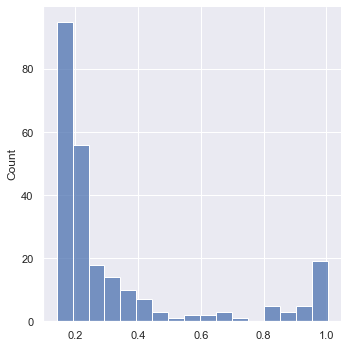

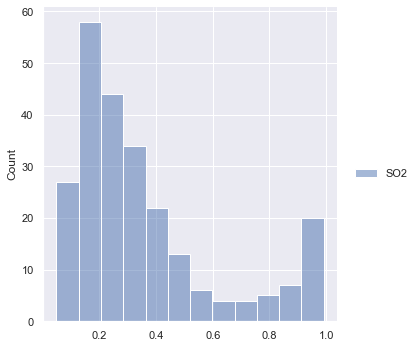

In [70]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_so2)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

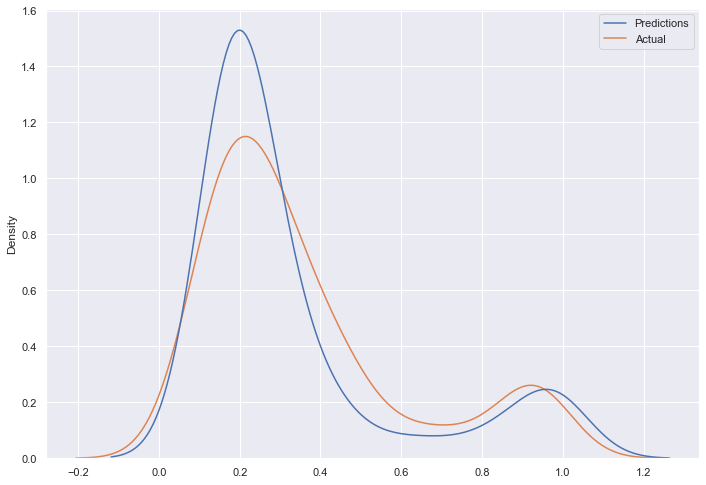

In [71]:
results = pd.DataFrame(predictions_so2, columns = ['Predictions'])
results["Actual"] = list(y_test["SO2"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### CO

In [72]:
data_co = pd.DataFrame()
data_co["month"] = ballygunge["month"]
data_co["week"] = ballygunge["week"]
data_co["week_day"] = ballygunge["week_day"]
data_co["CO"] = ballygunge["CO"]
cols = data_co.columns
data_co.head()

,month,week,week_day,CO
0,8,35,4,0.37
1,8,35,5,0.33
2,9,35,6,0.48
3,9,36,0,0.42
4,9,36,1,0.39


In [73]:
# shuffling the data set
data_co = data_co.sample(frac=1).reset_index()
data_co = data_co.drop('index', axis=1)
data_co.head()

,month,week,week_day,CO
0,4,15,2,0.37
1,8,32,5,0.29
2,9,38,0,0.34
3,6,22,6,0.36
4,1,1,5,1.13


In [74]:
duplicate_co = data_co.copy()

In [75]:
'''#normalizing the dataset
data_co = preprocessing.normalize(data_co,norm='l2')
data_co = pd.DataFrame(data_co, columns=cols)''' 
# Normalization is not working properly in terms of carbon monoxide

"#normalizing the dataset\ndata_co = preprocessing.normalize(data_co,norm='l2')\ndata_co = pd.DataFrame(data_co, columns=cols)"

In [76]:
X_co = data_co.drop('CO', axis=1) #data basically refere to the values in the independent columns
y_co = data_co.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [77]:
X_train = X_co.head(976)
X_test = X_co.tail(244)
y_train = y_co.head(976)
y_test = y_co.tail(244)

In [78]:
ballygunge_co_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [79]:
predictions_co = ballygunge_co_svr.predict(X_test)

In [80]:
r2 = r2_score(y_test, predictions_co)
print('r2 score for   model is', r2)

r2 score for   model is 0.6068269472173605


In [81]:
predictions_so2.shape

(244,)

In [82]:
#RSME - Root Mean Square Error
predictions5 = predictions_so2.reshape(244,1)
np.sqrt(((predictions5 - y_test)**2).mean())

CO    0.589914
dtype: float64

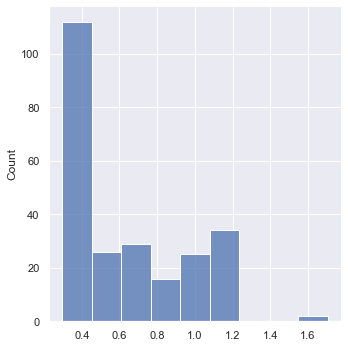

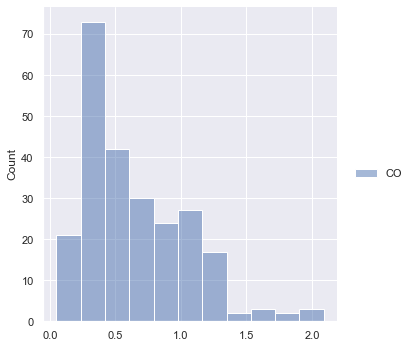

In [83]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_co)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

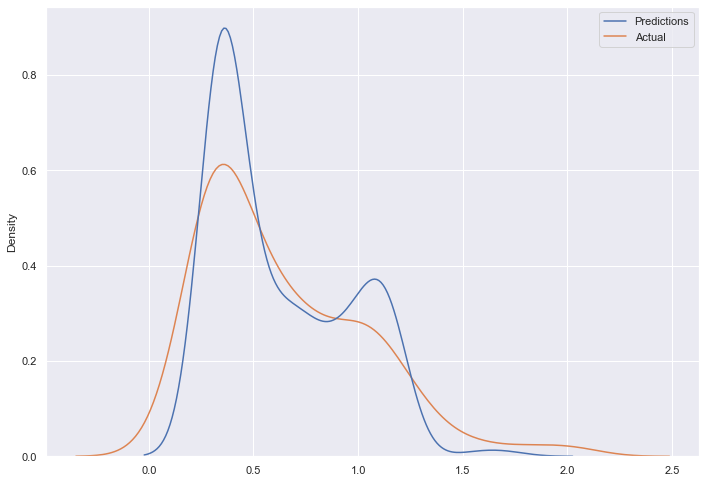

In [84]:
results = pd.DataFrame(predictions_co, columns = ['Predictions'])
results["Actual"] = list(y_test["CO"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### Ozone

In [85]:
data_ozone = pd.DataFrame()
data_ozone["month"] = ballygunge["month"]
data_ozone["week"] = ballygunge["week"]
data_ozone["week_day"] = ballygunge["week_day"]
data_ozone["Ozone"] = ballygunge["Ozone"]
cols = data_ozone.columns
data_ozone.head()

,month,week,week_day,Ozone
0,8,35,4,24.52
1,8,35,5,25.19
2,9,35,6,22.21
3,9,36,0,19.23
4,9,36,1,22.00


In [86]:
# shuffling the data set
data_ozone = data_ozone.sample(frac=1).reset_index()
data_ozone = data_ozone.drop('index', axis=1)
data_ozone.head()

,month,week,week_day,Ozone
0,1,1,4,17.92
1,9,36,4,23.21
2,12,53,2,43.42
3,7,31,4,12.72
4,8,31,1,34.60


In [87]:
duplicate_ozone = data_ozone.copy()

In [88]:
#normalizing the dataset
data_ozone = preprocessing.normalize(data_ozone,norm='l2')
data_ozone = pd.DataFrame(data_ozone, columns=cols)

In [89]:
X_o3 = data_ozone.drop('Ozone', axis=1) #data basically refere to the values in the independent columns
y_o3 = data_ozone.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [90]:
X_train = X_o3.head(976)
X_test = X_o3.tail(244)
y_train = y_o3.head(976)
y_test = y_o3.tail(244)

In [91]:
ballygunge_ozone_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [92]:
predictions_ozone = ballygunge_ozone_svr.predict(X_test)

In [93]:
r2 = r2_score(y_test, predictions_ozone)
print('r2 score for   model is', r2)

r2 score for   model is 0.9330320679012007


In [94]:
predictions_ozone.shape

(244,)

In [95]:
#RSME - Root Mean Square Error
predictions5 = predictions_ozone.reshape(244,1)
np.sqrt(((predictions5 - y_test)**2).mean())

Ozone    0.052526
dtype: float64

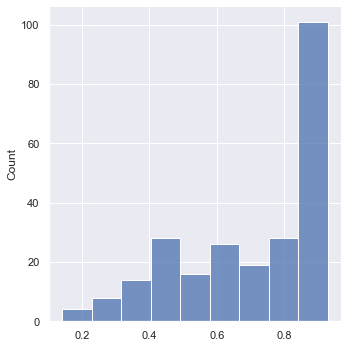

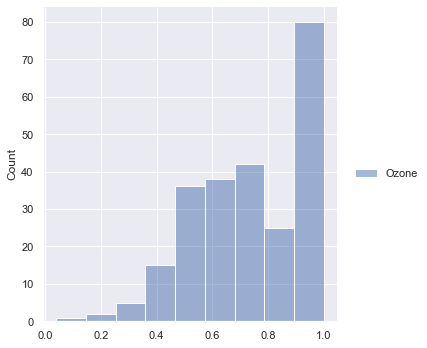

In [96]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_ozone)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

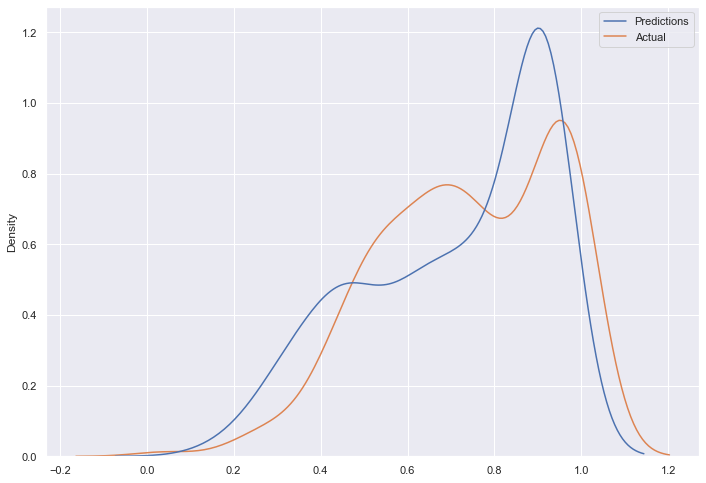

In [97]:
results = pd.DataFrame(predictions_ozone, columns = ['Predictions'])
results["Actual"] = list(y_test["Ozone"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### AQI

In [98]:
data_aqi = pd.DataFrame()
data_aqi["month"] = ballygunge["month"]
data_aqi["week"] = ballygunge["week"]
data_aqi["week_day"] = ballygunge["week_day"]
data_aqi["AQI"] = ballygunge["AQI"]
cols = data_aqi.columns
data_aqi.head()

,month,week,week_day,AQI
0,8,35,4,29.12
1,8,35,5,29.30
2,9,35,6,42.97
3,9,36,0,30.31
4,9,36,1,28.38


In [99]:
# shuffling the data set
data_aqi = data_aqi.sample(frac=1).reset_index()
data_aqi = data_aqi.drop('index', axis=1)
data_aqi.head()

,month,week,week_day,AQI
0,11,47,6,310.65
1,2,8,1,125.23
2,5,22,6,44.21
3,1,1,5,197.83
4,10,42,1,70.16


In [100]:
duplicate_aqi = data_aqi.copy()

In [101]:
#normalizing the dataset
data_aqi = preprocessing.normalize(data_aqi,norm='l2')
data_aqi = pd.DataFrame(data_aqi, columns=cols)

In [102]:
X_aqi = data_aqi.drop('AQI', axis=1) #data basically refere to the values in the independent columns
y_aqi = data_aqi.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [103]:
X_train = X_aqi.head(976)
X_test = X_aqi.tail(244)
y_train = y_aqi.head(976)
y_test = y_aqi.tail(244)

In [104]:
ballygunge_aqi_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [105]:
predictions_aqi = ballygunge_aqi_svr.predict(X_test)

In [106]:
r2 = r2_score(y_test, predictions_aqi)
print('r2 score for   model is', r2)

r2 score for   model is 0.5848872086146942


In [107]:
predictions_aqi.shape

(244,)

In [108]:
predictions3 = predictions_aqi.reshape(244,1)
np.sqrt(((predictions3 - y_test)**2).mean())

AQI    0.091156
dtype: float64

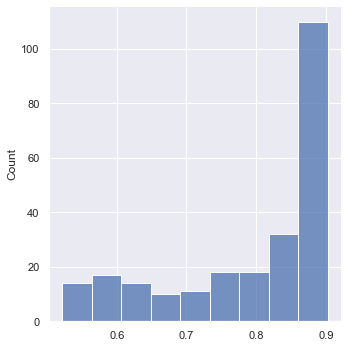

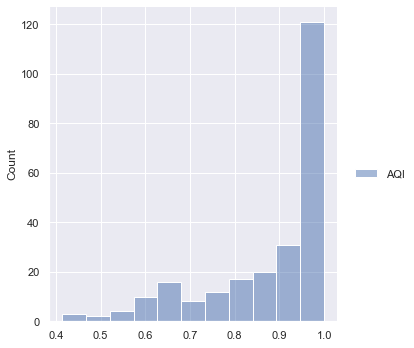

In [109]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_aqi)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

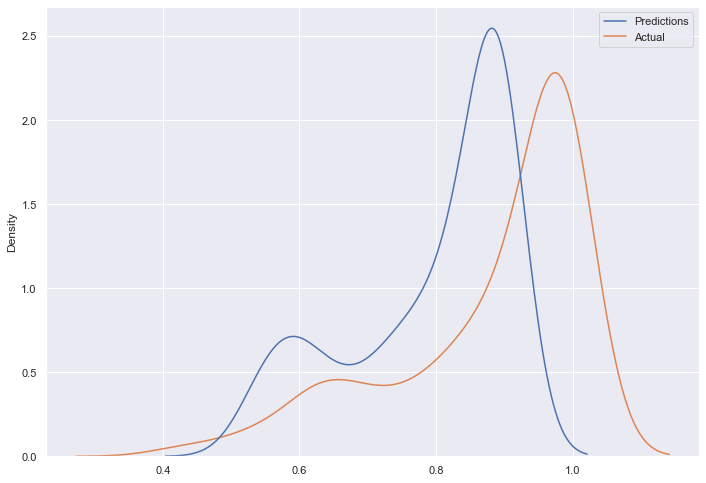

In [110]:
results = pd.DataFrame(predictions_aqi, columns = ['Predictions'])
results["Actual"] = list(y_test["AQI"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### Prediction Functions

In [111]:
##1. PM2.5 Sub-Index calculation
def PM25(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

##2. PM10 Sub-Index calculation
def PM10(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

##3. NO2 Sub-Index calculation
def NO2(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0


##4. NH3 Sub-Index calculation
def NH3(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

##5. SO2 Sub-Index calculation
def SO2(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

##6. CO Sub-Index calculation
def CO(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

##7. O3 Sub-Index calculation
def O3(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

In [112]:
def aqi(l):
    final = max(PM25(l[0]),PM10(l[1]),NO2(l[2]),NH3(l[3]),SO2(l[4]),CO(l[5]),O3(l[6]))
    if final >=0 and final<=50:
        return([round(final,2),"Good"])
    elif final>50 and final<=100:
        return([round(final,2),"Satisfactory"])
    elif final>100 and final<= 200:
        return([round(final,2),"Moderately Polluted"])
    elif final>200 and final<=300:
        return([round(final,2),"Poor"])
    elif final>300 and final<=400:
        return([round(final,2),"Very poor"])
    elif final>400:
        return([round(final,2),"Severe"])

In [113]:
def predictor_pm25(query, model_pm25,data_pm25,X):
    results = [] 
    location = data_pm25.loc[(data_pm25['month'] == query[0]) & (data_pm25['week'] == query[1]) & (data_pm25['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_pm25.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_pm25.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_pm10(query, model_pm10,data_pm10,X):
    results = [] 
    location = data_pm10.loc[(data_pm10['month'] == query[0]) & (data_pm10['week'] == query[1]) & (data_pm10['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_pm10.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_pm10.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_no2(query, model_no2, data_no2,X):
    results = []
    location = data_no2.loc[(data_no2['month'] == query[0]) & (data_no2['week'] == query[1]) & (data_no2['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_no2.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_no2.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_nh3(query, model_nh3, data_nh3,X):
    results = [] 
    location = data_nh3.loc[(data_nh3['month'] == query[0]) & (data_nh3['week'] == query[1]) & (data_nh3['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_nh3.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_nh3.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_so2(query, model_so2,data_so2,X):
    results = [] 
    location = data_so2.loc[(data_so2['month'] == query[0]) & (data_so2['week'] == query[1]) & (data_so2['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_so2.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_so2.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_co(query, model_co,data_co,X):
    results = [] 
    location = data_co.loc[(data_co['month'] == query[0]) & (data_co['week'] == query[1]) & (data_co['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_co.predict(np.array(query).reshape(1,-1)))
    return(sum(results) / len(results))

def predictor_o3(query, model_o3,data_o3,X):
    results = []
    location = data_o3.loc[(data_o3['month'] == query[0]) & (data_o3['week'] == query[1]) & (data_o3['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_o3.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_o3.loc[l]**2)))
    return(sum(results) / len(results))

In [114]:
def precal(date, model_pm25,model_pm10,model_no2,model_nh3,model_so2,model_co,model_o3,data_pm25,data_pm10,data_no2, data_nh3,data_so2,data_co,data_o3,X_pm25,X_pm10,X_no2,X_nh3,X_so2,X_co,X_o3):
    query = []
    result = []
    date = pd.DataFrame(date)
    date[0] = pd.to_datetime(date[0],format="%Y-%m-%d")
    query.append(list(date[0].dt.month)[0])
    query.append(list(date[0].dt.strftime('%V').astype('int64'))[0])
    query.append(list(date[0].dt.weekday)[0])
    result.append(predictor_pm25(query,model_pm25, data_pm25,X_pm25))
    result.append(predictor_pm10(query,model_pm10, data_pm10,X_pm10))
    result.append(predictor_no2(query,model_no2, data_no2,X_no2))
    result.append(predictor_nh3(query,model_nh3, data_nh3,X_nh3))
    result.append(predictor_so2(query,model_so2, data_so2,X_so2))
    result.append(predictor_co(query,model_co, data_co,X_co))
    result.append(predictor_o3(query,model_o3, data_o3,X_o3))
    ans = aqi(result)
    print("Expected:-\nPM 2.5: " + str(result[0])+"\nPM 10: " + str(result[1])+"\nNO2: " + str(result[2])+"\nNH3: " + str(result[3])+"\nSO2: " + str(result[4])+"\nCO: " + str(result[5])+"\nO3: " + str(result[6]))
    print("\nThe AQI value is expected to be around " + str(ans[0]) + " and the index is expected to be " + ans[1])
    

In [115]:
warnings.filterwarnings(action='ignore', category=FutureWarning) # setting ignore as a parameter and further adding category
warnings.filterwarnings(action='ignore', category=UserWarning) # setting ignore as a parameter and further adding category
precal(["2019-08-30"],ballygunge_pm25_svr,ballygunge_pm10_model_svr,ballygunge_no2_svr,ballygunge_nh3_svr,ballygunge_so2_svr,ballygunge_co_svr,ballygunge_ozone_svr,duplicate_pm25,duplicate_pm10,duplicate_no2,duplicate_nh3,duplicate_so2,duplicate_co,duplicate_ozone,X_pm25,X_pm10,X_no2,X_nh3,X_so2,X_co,X_o3)

Expected:-
PM 2.5: [20.39411237]
PM 10: [27.01055087]
NO2: [21.7992326]
NH3: [20.11921368]
SO2: [19.70150944]
CO: [0.73314863]
O3: [26.27518558]

The AQI value is expected to be arouynd 36.66 and the index is expected to be Good
